# Cognizant AI 
## Stock Prediction (ML Production)


**Purpose:** This assessment is an extensive machine learning project. The task is to prepare a Python module that contains code to train a model and output the performance metrics when the file is run, assuming that the Python file does not need to process, clean or transform the dataset. 


##  1. Importing important packages and libraries 

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statistics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## 2. Data loading

In [2]:
# Loading & printing the dataset
path = "D:/AI or Data Science Internships/Cognizant AI/Task-3/cognizantai_merged_dataset.csv"

sp_df = pd.read_csv(path)
sp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sp_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 3. Modelling & Evaluation

Now, we will train the machine learning model. We will use a supervised machine learning model, and we will use `estimated_stock_pct` as the target variable, since the problem statement was focused on being able to predict the stock levels of products on an hourly basis.

Whilst training the machine learning model, we will use `cross-validation`, which is a technique where we hold back a portion of the dataset for testing in order to compute how well the trained machine learning model is able to predict the target variable.

Finally, to ensure that the trained machine learning model is able to perform robustly, we will want to test it several times on random samples of data, not just once. Hence, we will use a `K-fold` strategy to train the machine learning model on `K` (K is an integer to be decided) random samples of the data.

First, let's create our target variable `y` and independent variables `X`

### Splitting the dataset into Training and Test data

In [3]:
# Splitting data into features & target variable
X = sp_df.drop(columns=['estimated_stock_pct'])
y = sp_df['estimated_stock_pct']

# Printing the dimensions of features & target variable
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


This shows that we have 28 predictor variables that we will train our machine learning model on and 10845 rows of data.

Now let's define how many folds we want to complete during training, and how much of the dataset to assign to training (75%), leaving the rest for test (25%).

In [4]:
# Defining number of folds for cross validation & splitting the dataset
K = 10
split = 0.75

we are going to use a `RandomForestRegressor` model, which is an instance of a Random Forest.

We are using a `regression` algorithm here because we are predicting a continuous numeric variable, that is, `estimated_stock_pct`. A `classification` algorithm would be suitable for scenarios where you're predicted a binary outcome, e.g. True/False.

And now let's create a loop to train `K` models with a 75/25% random split of the data each time between training and test samples

### Building the Random Forest Regressor & evaluating Mean Absolute Error (MAE)

In [5]:
# Create a list that will store the accuracies of each fold
accuracy = []

# Enter a loop to run K folds of cross-validation
for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

# Finish by computing the average MAE across all folds    
print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")


Fold 1: MAE = 0.236
Fold 2: MAE = 0.236
Fold 3: MAE = 0.236
Fold 4: MAE = 0.236
Fold 5: MAE = 0.236
Fold 6: MAE = 0.237
Fold 7: MAE = 0.237
Fold 8: MAE = 0.236
Fold 9: MAE = 0.237
Fold 10: MAE = 0.237
Average MAE: 0.24


The `mean absolute error` (MAE) is almost exactly the same each time which shows that the performance of the model is consistent across different random samples of the data, which is what required by us & shows a robust nature of the model.

The `MAE` was chosen as a performance metric because it describes how closely the machine learning model was able to predict the exact value of `estimated_stock_pct`.

Even though the model is predicting robustly, this value for MAE is unimportant, since the average value of the target variable (accuracy as a percentage) is around 0.24 (24%) which is very large. In an ideal world, we would want the MAE to be as low as possible. Through iterative process of machine learning comes using more data we can gain better accuracy. At this stage, since we only have small samples of the data, we can report back to the business with these findings and recommend that the dataset needs to be further engineered, or more datasets need to be added.

Furthermore, we can use the trained model to intepret which features were signficant when the model was predicting the target variable. 

### Feature selection 

In [6]:
def print_best_worst (scores):
    scores = sorted(scores, reverse = True)
    
    print("The 5 best features selected by this method are :")
    for i in range(5):
        print(scores[i][1])
    
    print ("The 5 worst features selected by this method are :")
    for i in range(5):
        print(scores[len(scores)-1-i][1])

In [7]:
# define the model
rfmodel_feat = RandomForestRegressor()

# fit the model
rfmodel_feat.fit(X, y)

# get importance
rfimportance = rfmodel_feat.feature_importances_

# summarize feature importance
for i,v in enumerate(rfimportance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
scores = []
num_features = len(X.columns)

for i in range(num_features):
    scores.append((rfmodel_feat.feature_importances_[i],X.columns[i]))
        
print_best_worst(scores)

Feature: 0, Score: 0.08356
Feature: 1, Score: 0.17078
Feature: 2, Score: 0.28089
Feature: 3, Score: 0.05238
Feature: 4, Score: 0.05310
Feature: 5, Score: 0.10978
Feature: 6, Score: 0.01294
Feature: 7, Score: 0.01326
Feature: 8, Score: 0.01242
Feature: 9, Score: 0.01398
Feature: 10, Score: 0.01238
Feature: 11, Score: 0.01343
Feature: 12, Score: 0.01298
Feature: 13, Score: 0.01149
Feature: 14, Score: 0.01026
Feature: 15, Score: 0.01495
Feature: 16, Score: 0.00681
Feature: 17, Score: 0.01026
Feature: 18, Score: 0.00897
Feature: 19, Score: 0.00921
Feature: 20, Score: 0.01083
Feature: 21, Score: 0.01546
Feature: 22, Score: 0.01006
Feature: 23, Score: 0.01230
Feature: 24, Score: 0.00960
Feature: 25, Score: 0.00906
Feature: 26, Score: 0.01087
Feature: 27, Score: 0.00800
The 5 best features selected by this method are :
unit_price
temperature
timestamp_hour
quantity
timestamp_day_of_week
The 5 worst features selected by this method are :
category_fruit
category_vegetables
category_meat
categor

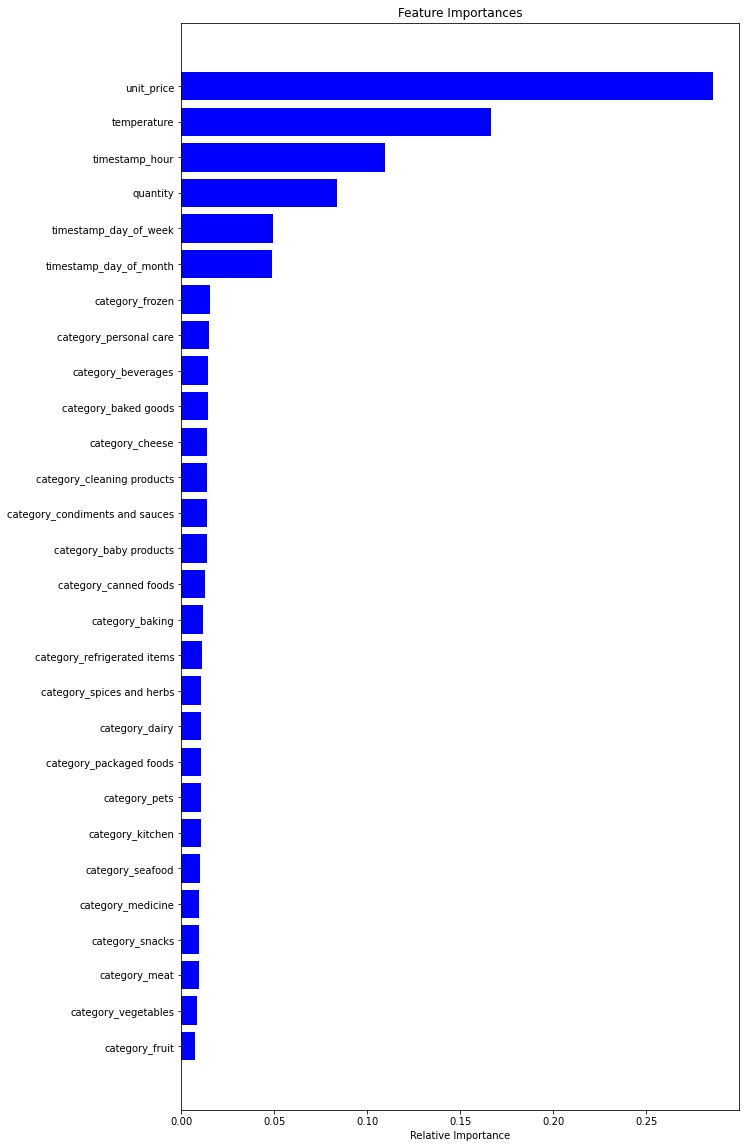

In [8]:
# Performing Feature importance to check relevant features in the dataset
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_importances.png')
plt.show()

**Through feature importance we can conclude that:**

- The product categories were insignificant
- The unit price and temperature were crucial in predicting stock
- The hour of day was also important for predicting stock